<a href="https://colab.research.google.com/github/zeyysh/Applied-Data-Analysis/blob/main/ADS_Exercise2_Exploratory_Analysis_and_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2: Exploratory Analysis and Data

Darya Khaksari, Zeynab Shiri

Dataset name: **HEART ATTACK ANALYSIS AND PREDICTION**

---




# Loading the dataset

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt

Dataset (an excel file named 'Heart') can be downloaded from [here](httpshttps://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset://).

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.xls to heart (1).xls


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['heart.xls']))
# Dataset is now stored in a Pandas Dataframe

*italicized text*# About the dataset

In [ ]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (303, 14)


Some columns need their title to be changed to due typo mistake, such as caa > ca, thalachh > thalach

In [ ]:
df = df.rename(columns ={'caa' : 'ca', 'thalachh' : 'thalach'})

In [ ]:
df.head() 

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exng,oldpeak,slp,ca,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Columns Description

**Age** : Age of the patient

**Sex** : Sex of the patient

**cp** : Chest Pain type

* Value 0: typical angina
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: asymptomatic

**trtbps** : resting blood pressure (in mm Hg)

**chol**: cholesterol in mg/dl fetched via BMI sensor

**fbs**: (fasting blood sugar > 120 mg/dl)

* 1 = true
* 0 = false

**rest_ecg**: resting electrocardiographic results

* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach**: maximum heart rate achieved

**exang**: exercise induced angina

* 1 = yes
* 0 = no

**old peak**: ST depression induced by exercise relative to rest

**slp**: the slope of the peak exercise ST segment
* 0 = unsloping
* 1 = flat
* 2 = downsloping

**ca**: number of major vessels colored by fluoroscopy (0 - 3)

**thall** : thalassemia

* 0 = null
* 1 = fixed defect
* 2 = normal
* 3 = reversable defect

**output**: diagnosis of heart disease (angiographic disease status)
* 0: < 50% diameter narrowing. less chance of heart disease
* 1: > 50% diameter narrowing. more chance of heart disease


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   trtbps   303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   thalach  303 non-null    int64  
 8   exng     303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slp      303 non-null    int64  
 11  ca       303 non-null    int64  
 12  thall    303 non-null    int64  
 13  output   303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exng,oldpeak,slp,ca,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Cleaning

## Exploting origins of dirty data

* *Do we have incomplete data?* *(field left blank, NaN values)*



In [ ]:
df.isnull().sum()

age        0
sex        0
cp         0
trtbps     0
chol       0
fbs        0
restecg    0
thalach    0
exng       0
oldpeak    0
slp        0
ca         0
thall      0
output     0
dtype: int64

* *Do we have incorrect data?*
For example entering a value which isn't defined in the categorial columns. So let's check if there's such issue in the df.

In [ ]:
categorial_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp',
                      'ca', 'thall', 'output']

for col in categorial_columns:
  print(df[col].value_counts())
  print()

1    207
0     96
Name: sex, dtype: int64

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

0    258
1     45
Name: fbs, dtype: int64

1    152
0    147
2      4
Name: restecg, dtype: int64

0    204
1     99
Name: exng, dtype: int64

2    142
1    140
0     21
Name: slp, dtype: int64

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

1    165
0    138
Name: output, dtype: int64



Compared to the values in Column Description, there's no incorrect data in the df, except for "ca" which the values should be from 0 to 3, but there are 5 rows which their "ca" is 4.

Fluoroscopy shows blood flowing through the arteries. It is used to diagnose and treat some heart conditions. So those 5 patients have 4 vessesls causing their heart condition.

As it's said in [this article](https://www.sciencedirect.com/science/article/pii/S2352914820300125), datasets for heart disease prediction are Cleveland, Hungarian, and combination of these two (CH). The first two use 4 major vessels, while the last one uses 5 including: LADDIST, RCAPROX, OM1, CXMAIN, and LADPROX. So it's most likely that this data is from the CH dataset.



*What percentage of the df has the value 4 for their ca?*




In [ ]:
five_vessel_count = df.loc[df.ca == 4].shape[0]
ratio_five_vessels = (five_vessel_count / df.shape[0]) * 100
print("The percentage of data with ca = 4 : ", ratio_five_vessels)

The percentage of data with ca = 4 :  1.65016501650165


*What should be done for this issue?*

The left main coronary artery (LAD) including the first 4 vessels, is considered to be more important because of supplying more than half of the blood to the heart. Thus the numbers 0 to 3 referre to these vessels conditions.

Also, as it's only 1.6% of the data to have such issue, we can drop those rows, in order to assess what can happen to the greater part of the dataset. So the initial decision is to consider these 5 rows as noise and omit them.

In [ ]:
deleted_rows_index = df.loc[df.ca == 4].index
deleted_rows_index

Int64Index([92, 158, 163, 164, 251], dtype='int64')

In [ ]:
deleted_rows_index = df.loc[df.ca == 4].index
df_dl = df.drop(deleted_rows_index, axis = 0, inplace = False)
print("The shape of the df with deleted rows of ca = 4 : ", df_dl.shape)

The shape of the df with deleted rows of ca = 4 :  (298, 14)


* *Do we have inconsistent data?*

There's no inconsistency (such as inconsistent metrics) in this dataset.



* *Do we have duplicate data?*

In [ ]:
print("number of duplicated rows : ", df_dl.duplicated().sum())

number of duplicated rows :  0


# Data preprocessing and convertion to numerical values

This dataset already has columns with either int64 or fload64 type. So there's no further work to do in this section.

Yet for the sake of practicng, we can assume that the sex column was filled with 'female' and 'male' values. So the code for changing them to 0 and 1 respectively, would be as such:

    female_rows_index = df_dl.loc[df_dl.sex == 'female'].index

    df_dl.loc[female_rows_index, 'sex'] = 0

The 'male' to 1 is with the same logic.

# Scaling



A lot of algorithms such as LDA, Guassian naive bayes work with normalized data. 

One approach to scale columns is using minmax_scaling.

In [ ]:
sc_df = minmax_scaling(df_dl, columns = df_dl.columns)
sc_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exng,oldpeak,slp,ca,thall,output
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.000000,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.000000,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.000000,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.000000,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.000000,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.000000,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.000000,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.666667,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.333333,1.000000,0.0


As we know, by scaling only the value of the column is changed not the shape of the data distribution.

Sample of scaling effect on column *'age'*

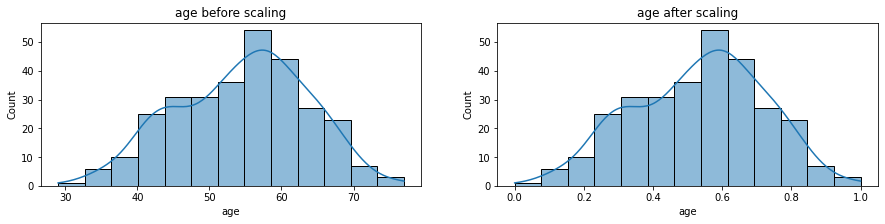

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15,3))
sns.histplot(df_dl['age'], ax = ax[0], kde = True, legend = False)
ax[0].set_title('age before scaling')
sns.histplot(sc_df['age'], ax = ax[1], kde = True, legend =False)
ax[1].set_title('age after scaling')
plt.show()

# Normalization

There is a problem with normalizing all columns in the df with a for loop or using apply method all together. The error is 'Data must be positive.'.

The code iwith for loop:

    normalized_dff = df_dl.copy()
      for col in df_dl.columns:
        normalized_dff[col] = stats.boxcox(df_dl[col])[0]
    normalized_dff.head()

The code with apply method:

    normalized_d = df_dl.copy()
    def normization(col):
      col_name = col.name
      normalized_d[col_name] = stats.boxcox(col)[0]
    df_dl.apply(normization, axis = 'index')
    normalized_d.head()

**So how to solve this issue above?**

To normalize a signle column like 'age', we use the code below. As it's shown, column 'age' has a normal shape even before being normalized.

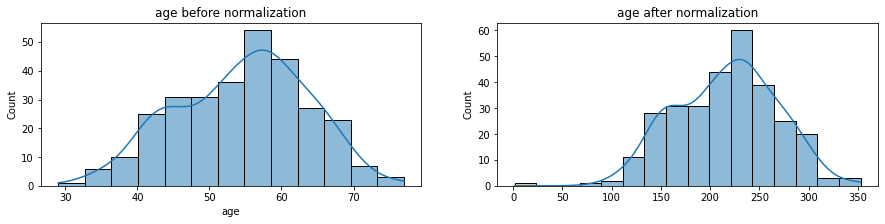

In [ ]:
age_data = df_dl.age
normalized_age = stats.boxcox(age_data)
fig, ax = plt.subplots(1, 2, figsize = (15,3))
sns.histplot(df_dl['age'], ax = ax[0], kde = True, legend = False)
ax[0].set_title('age before normalization')
sns.histplot(normalized_age, ax = ax[1], kde = True, legend =False)
ax[1].set_title('age after normalization')
plt.show()

Comparing column 'chol' before and after normalization:

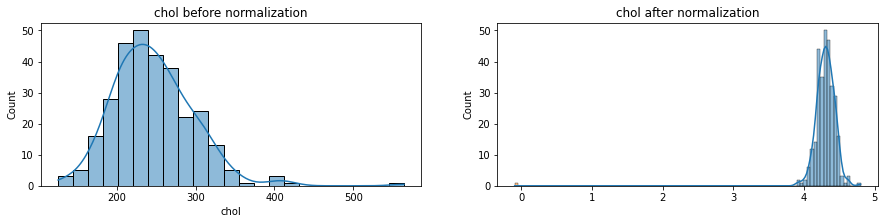

In [ ]:
chol_data = df_dl.chol
normalized_chol = stats.boxcox(chol_data)
fig, ax = plt.subplots(1, 2, figsize = (15,3))
sns.histplot(df_dl['chol'], ax = ax[0], kde = True, legend = False)
ax[0].set_title('chol before normalization')
sns.histplot(normalized_chol, ax = ax[1], kde = True, legend =False)
ax[1].set_title('chol after normalization')
plt.show()

We can also normalize the df this way: subtracting mean of each column from its data then deviding by its std.

In [ ]:
nr_df = (df_dl-df_dl.mean())/df_dl.std()
nr_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exng,oldpeak,slp,ca,thall,output
0,0.940137,0.688224,1.973250,0.759479,-0.267975,2.398615,-0.994244,0.023214,-0.698825,1.069121,-2.260414,-0.718925,-2.136856,0.920911
1,-1.938986,0.688224,1.006098,-0.089451,0.059622,-0.415508,0.905017,1.633042,-0.698825,2.099905,-2.260414,-0.718925,-0.508255,0.920911
2,-1.496044,-1.448139,0.038946,-0.089451,-0.826816,-0.415508,-0.994244,0.980409,-0.698825,0.296033,0.978064,-0.718925,-0.508255,0.920911
3,0.164988,0.688224,0.038946,-0.655405,-0.210164,-0.415508,0.905017,1.241462,-0.698825,-0.219359,0.978064,-0.718925,-0.508255,0.920911
4,0.275724,-1.448139,-0.928207,-0.655405,2.063742,-0.415508,0.905017,0.588829,1.426172,-0.391156,0.978064,-0.718925,-0.508255,0.920911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.275724,-1.448139,-0.928207,0.476503,-0.113812,-0.415508,0.905017,-1.151524,1.426172,-0.734751,-0.641175,-0.718925,1.120346,-1.082238
299,-1.053102,0.688224,1.973250,-1.221358,0.329407,-0.415508,0.905017,-0.759945,-0.698825,0.124236,-0.641175,-0.718925,1.120346,-1.082238
300,1.493815,0.688224,-0.928207,0.702884,-1.038790,2.398615,0.905017,-0.368365,-0.698825,2.014007,-0.641175,1.412812,1.120346,-1.082238
301,0.275724,0.688224,-0.928207,-0.089451,-2.233554,-0.415508,0.905017,-1.499595,1.426172,0.124236,-0.641175,0.346944,1.120346,-1.082238


In [ ]:
nr_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exng,oldpeak,slp,ca,thall,output
count,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,298.000000
mean,3.338120e-16,-2.384372e-17,9.537486e-17,-2.742027e-16,1.996911e-16,-5.364836e-17,-1.788279e-17,-4.768743e-17,-1.192186e-16,-1.669060e-16,-4.768743e-17,2.384372e-17,2.384372e-16,0.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
min,-2.824871e+00,-1.448139e+00,-9.282066e-01,-2.126884e+00,-2.329906e+00,-4.155082e-01,-9.942436e-01,-3.413985e+00,-6.988245e-01,-9.065480e-01,-2.260414e+00,-7.189248e-01,-3.765457e+00,-1.082238
25%,-7.208957e-01,-1.448139e+00,-9.282066e-01,-6.554046e-01,-6.919233e-01,-4.155082e-01,-9.942436e-01,-7.164360e-01,-6.988245e-01,-9.065480e-01,-6.411750e-01,-7.189248e-01,-5.082547e-01,-1.082238
50%,1.649885e-01,6.882243e-01,3.894573e-02,-8.945105e-02,-1.041765e-01,-4.155082e-01,9.050166e-01,1.319866e-01,-6.988245e-01,-2.193587e-01,-6.411750e-01,-7.189248e-01,-5.082547e-01,0.920911
75%,7.186661e-01,6.882243e-01,1.006098e+00,4.765025e-01,5.413814e-01,-4.155082e-01,9.050166e-01,7.084788e-01,1.426172e+00,4.678307e-01,9.780636e-01,3.469438e-01,1.120346e+00,0.920911
max,2.490434e+00,6.882243e-01,1.973250e+00,3.872224e+00,6.110523e+00,2.398615e+00,2.804277e+00,2.285675e+00,1.426172e+00,4.419169e+00,9.780636e-01,2.478681e+00,1.120346e+00,0.920911


# Correlation Analysis

In [ ]:
cor_table = df.corr()
cor_table

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exng,oldpeak,slp,ca,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


By looking at the last column which is the target of this project (heart attack prediction), it's shown that factors such as cp, thalach, and slp have positive linear correlation with the target, meaning they increase and decrease together, while exng, oldpeak, ca, and thall have negative linear correlation with the target.

At least we can have an idea now, about what features we must consider in the next steps.

In [ ]:
cor_table.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exng,oldpeak,slp,ca,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
